In [30]:
import pandas as pd, numpy as np
from fidap import fidap_client
import config

In [31]:
fidap = fidap_client(api_key=config.FIDAP_API_KEY)

In [33]:
def factor_analysis(factor: str):
    """
    Function to return the Dataframe of percent change in share price by 10 groups based on a factor.
    """
    df = fidap.sql(f"""
    SELECT 
        avg(pc_1d)*100 as return,
        group_no 
    FROM
      (
      SELECT
          ticker,
          date,
          pc_1d,
          {factor},
          NTILE(10) OVER(ORDER BY {factor} DESC) AS group_no
       FROM fidapschema.tickers
       WHERE marketcap > 100000000 AND {factor} IS NOT NULL
       ) AS tmp 
    GROUP BY group_no
    ORDER BY group_no;""")
    return df

# Factor investing analysis

Market factors, such as momentum and value, ...

## Further reading

Here are some great resources on further reading around factor investing:

 - [Investopedia - Factor Investing](https://www.investopedia.com/terms/f/factor-investing.asp)
 - [Fidelity](https://www.fidelity.com/bin-public/060_www_fidelity_com/documents/fidelity/fidelity-overview-of-factor-investing.pdf)
    

## Marketcap Factor 1D Returns

Let's do a query that splits tickers into deciles based on their market cap. We can use the built in SQL function NTILE ([Snowflake docs](https://docs.snowflake.com/en/sql-reference/functions/ntile.html)). After we split the companies into deciles (called `group_no`), we then group them, take the average return at the decile level, and order by the `group_no`.

In [35]:
df_marketcap = factor_analysis('marketcap')

In [36]:
df_marketcap

,return,group_no
0,-0.522120,1
1,-1.327169,2
2,-2.003102,3
3,-2.374373,4
4,-2.637349,5
5,-2.460720,6
6,-2.539594,7
7,-2.435633,8
8,-2.250781,9
9,-2.631467,10


<AxesSubplot:xlabel='group_no'>

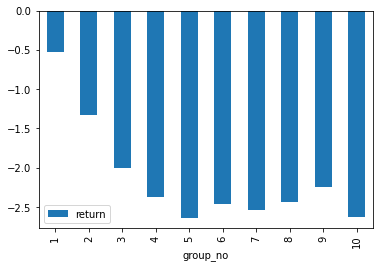

In [37]:
df_marketcap.plot.bar(x="group_no", y="return")

## Value Factor (Profit/Sales Ratio)

In [38]:
df_value = factor_analysis('ps')

In [39]:
df_value

,return,group_no
0,-3.473432,1
1,-2.281721,2
2,-2.087256,3
3,-2.011146,4
4,-1.785697,5
5,-1.712317,6
6,-1.731204,7
7,-1.772636,8
8,-2.099649,9
9,-2.114905,10


<AxesSubplot:xlabel='group_no'>

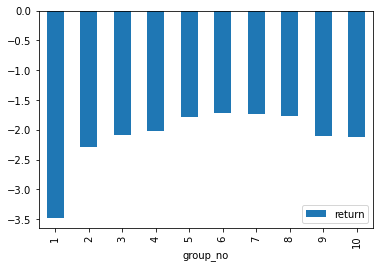

In [40]:
df_value.plot.bar(x="group_no", y="return")

## Volatility

In [41]:
df_volatility = factor_analysis('std_3m')

In [42]:
df_volatility

,return,group_no
0,-3.866344,1
1,-3.801551,2
2,-3.187571,3
3,-2.629467,4
4,-2.246286,5
5,-2.052851,6
6,-1.679018,7
7,-1.165883,8
8,-0.540121,9
9,-0.012427,10


<AxesSubplot:xlabel='group_no'>

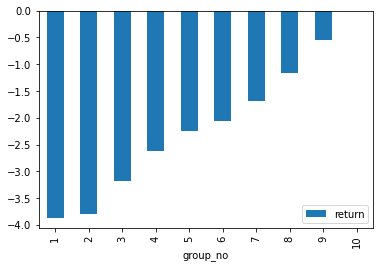

In [43]:
df_volatility.plot.bar(x="group_no", y="return")

## Momentum Factor

In [44]:
df_momentum = factor_analysis('pc_3m')

In [45]:
df_momentum

,return,group_no
0,-3.247835,1
1,-2.696473,2
2,-2.752110,3
3,-2.110512,4
4,-1.942751,5
5,-1.704591,6
6,-1.583629,7
7,-1.344047,8
8,-1.165064,9
9,-2.827030,10


<AxesSubplot:xlabel='group_no'>

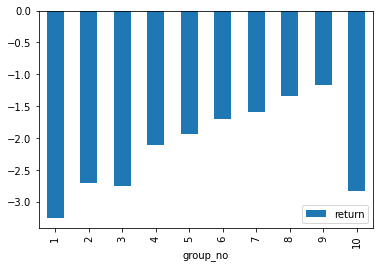

In [46]:
df_momentum.plot.bar(x="group_no", y="return")

## Profit Margin

In [47]:
df_pm = factor_analysis('netmargin')

In [48]:
df_pm

,return,group_no
0,-1.556234,1
1,-1.727706,2
2,-1.282930,3
3,-1.527860,4
4,-1.822281,5
5,-1.818887,6
6,-2.075926,7
7,-2.613360,8
8,-3.309630,9
9,-3.338665,10


<AxesSubplot:xlabel='group_no'>

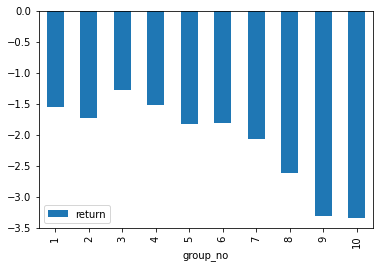

In [49]:
df_pm.plot.bar(x="group_no", y="return")

## Payout Ratio

In [50]:
df_por = factor_analysis('payoutratio')

In [51]:
df_por

,return,group_no
0,-0.968483,1
1,-1.183973,2
2,-1.423361,3
3,-1.642463,4
4,-3.169648,5
5,-3.569942,6
6,-2.595318,7
7,-2.350378,8
8,-2.903161,9
9,-2.144669,10


<AxesSubplot:xlabel='group_no'>

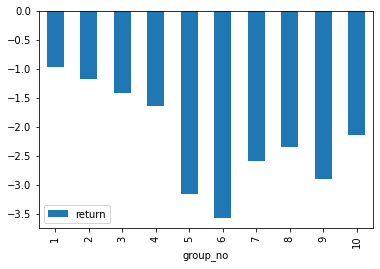

In [52]:
df_por.plot.bar(x="group_no", y="return")

## Dividend Yield

In [53]:
df_yield = factor_analysis('divyield')

In [54]:
df_yield

,return,group_no
0,-1.347098,1
1,-1.413069,2
2,-1.256021,3
3,-1.355810,4
4,-1.336543,5
5,-3.378083,6
6,-3.440723,7
7,-2.718960,8
8,-2.391923,9
9,-2.898487,10


<AxesSubplot:xlabel='group_no'>

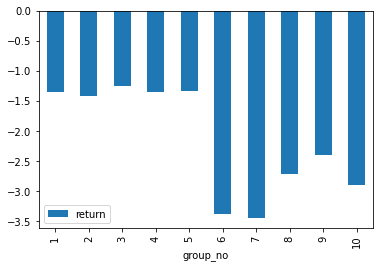

In [55]:
df_yield.plot.bar(x="group_no", y="return")

## Free Cash Flow

In [56]:
df_fcf = factor_analysis('fcf')

In [57]:
df_fcf

,return,group_no
0,-0.773261,1
1,-1.375993,2
2,-2.195953,3
3,-2.059337,4
4,-2.165770,5
5,-2.365116,6
6,-2.269149,7
7,-3.780405,8
8,-3.143133,9
9,-1.480998,10


<AxesSubplot:xlabel='group_no'>

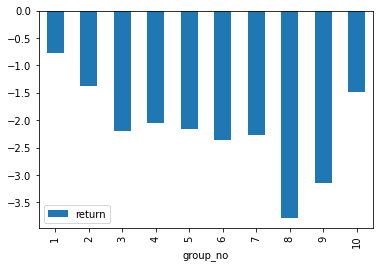

In [58]:
df_fcf.plot.bar(x="group_no", y="return")